In [74]:
import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [75]:
df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")

# Data Cleaning

In [78]:
### Creating a copy of dataset for cleaning

In [84]:
dfclean=df.copy()


In [112]:
#dfclean.isna().any().head(195)
#pd.set_option('dfclean.max_columns', 500)

dfclean.isna().any()


#dfclean.columns[dfclean.isnull().any()].tolist()


iid         False
id           True
gender      False
idg         False
condtn      False
wave        False
round       False
position    False
positin1     True
order       False
partner     False
pid          True
match       False
int_corr     True
samerace    False
age_o        True
race_o       True
pf_o_att     True
pf_o_sin     True
pf_o_int     True
pf_o_fun     True
pf_o_amb     True
pf_o_sha     True
dec_o       False
attr_o       True
sinc_o       True
intel_o      True
fun_o        True
amb_o        True
shar_o       True
            ...  
amb1_3       True
shar1_3      True
attr7_3      True
sinc7_3      True
intel7_3     True
fun7_3       True
amb7_3       True
shar7_3      True
attr4_3      True
sinc4_3      True
intel4_3     True
fun4_3       True
amb4_3       True
shar4_3      True
attr2_3      True
sinc2_3      True
intel2_3     True
fun2_3       True
amb2_3       True
shar2_3      True
attr3_3      True
sinc3_3      True
intel3_3     True
fun3_3       True
amb3_3    

#columns to drop
positin1, pf_o_att,pf_o_sin ,pf_o_int , pf_o_fun,pf_o_amb, pf_o_sha,undergra, mn_sat, tution, imprelig, from, zipcode, goal, go_out, date, sports, tvsports, exercise, dinning........yoga!!!
exphappy,expnum,numdat_2, length, satis_2

##take mean and replace na values in age_o by mean value, same for attr_o,sinc_o,
intel_o,fun_o,amb_o,shar_o,like_o, prob_o, age, 

#career and carrer_c replace ? with undecided i.e 10 and missing values with other i.e 15

#check these columns (keep:  you_call, them_cal, date_3, numdat_3, num_in_3 )


#replace null values of race with other i.e 6

#imprace remove null values

##doubt- is it a good idea to fill na values in race_o ? -Bhagyshri to confirm!!



In [86]:
dfclean.int_corr

0       0.14
1       0.54
2       0.16
3       0.61
4       0.21
5       0.25
6       0.34
7       0.50
8       0.28
9      -0.36
10      0.29
11      0.18
12      0.10
13     -0.21
14      0.32
15      0.73
16      0.60
17      0.07
18      0.11
19      0.39
20     -0.24
21     -0.14
22      0.09
23     -0.04
24     -0.14
25     -0.30
26     -0.26
27      0.29
28     -0.15
29     -0.47
        ... 
8348    0.55
8349    0.46
8350    0.48
8351    0.41
8352    0.29
8353   -0.55
8354    0.09
8355   -0.32
8356    0.68
8357    0.63
8358    0.83
8359    0.73
8360    0.55
8361    0.54
8362    0.39
8363    0.59
8364    0.43
8365    0.47
8366    0.45
8367    0.37
8368    0.27
8369    0.45
8370    0.35
8371    0.59
8372    0.28
8373    0.64
8374    0.71
8375   -0.46
8376    0.62
8377    0.01
Name: int_corr, Length: 8378, dtype: float64

In [73]:
a=df.groupby('iid')['attr1_1'].mean().mean()
a

22.68547794117648

In [32]:
b=df.groupby('iid')['sinc1_1'].mean().mean()
b

17.290753676470587

In [33]:
c=df.groupby('iid')['intel1_1'].mean().mean()
c

20.170477941176472

In [34]:
d=df.groupby('iid')['fun1_1'].mean().mean()
d

17.451362799263354

In [35]:
e=df.groupby('iid')['amb1_1'].mean().mean()
e

10.806476014760147

In [36]:
f=df.groupby('iid')['shar1_1'].mean().mean()
f

11.832125693160815

In [37]:
sum=a+b+c+d+e+f
sum

100.23667406600786

In [38]:
#creating a new dataframe of all attributes with mean values
data = {'Mean':[a,b,c,d,e,f]}
attMean=pd.DataFrame(data, index=['Attractive','Sincere','Intelligent','Fun','Ambitious','Hobbies']) 
attMean

,Mean
Attractive,22.685478
Sincere,17.290754
Intelligent,20.170478
Fun,17.451363
Ambitious,10.806476
Hobbies,11.832126


/Users/kshitijasankhe/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


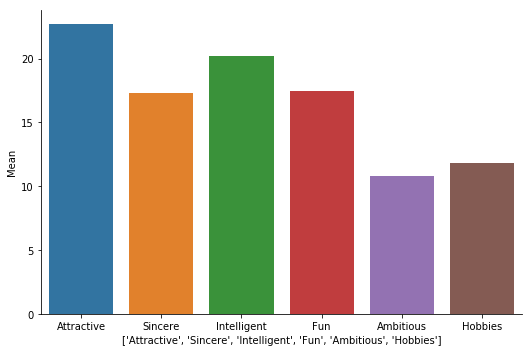

In [39]:
sns.factorplot(y='Mean', data=attMean, \
               x=['Attractive','Sincere','Intelligent','Fun','Ambitious','Hobbies'],aspect=1.5, kind='bar')

## Finding 1-c

In [40]:
dff=df[df.gender==0]
dfm=df[df.gender==1]

In [41]:
#before event female
FbeforeA=dff.groupby('iid')['attr1_1'].mean().mean()
FbeforeS=dff.groupby('iid')['sinc1_1'].mean().mean()
FbeforeI=dff.groupby('iid')['intel1_1'].mean().mean()
FbeforeF=dff.groupby('iid')['fun1_1'].mean().mean()
FbeforeAM=dff.groupby('iid')['amb1_1'].mean().mean()
FbeforeH=dff.groupby('iid')['shar1_1'].mean().mean()

In [42]:
#before event female
MbeforeA=dfm.groupby('iid')['attr1_1'].mean().mean()
MbeforeS=dfm.groupby('iid')['sinc1_1'].mean().mean()
MbeforeI=dfm.groupby('iid')['intel1_1'].mean().mean()
MbeforeF=dfm.groupby('iid')['fun1_1'].mean().mean()
MbeforeAM=dfm.groupby('iid')['amb1_1'].mean().mean()
MbeforeH=dfm.groupby('iid')['shar1_1'].mean().mean()

In [43]:
#creating a new dataframe of all attributes with mean values for female
Fdata = {'BeforeFemale':[FbeforeA,FbeforeS,FbeforeI,FbeforeF,FbeforeAM,FbeforeH]}
FBeforeDateAttributes=pd.DataFrame(Fdata, index=['Attractive','Sincere','Intelligent','Fun','Ambitious','Hobbies']) 
FBeforeDateAttributes

,BeforeFemale
Attractive,18.020372
Sincere,18.222230
Intelligent,20.971004
Fun,17.299108
Ambitious,12.818476
Hobbies,12.697836


In [44]:
#creating a new dataframe of all attributes with mean values for female
Mdata = {'BeforeMale':[MbeforeA,MbeforeS,MbeforeI,MbeforeF,MbeforeAM,MbeforeH]}
MBeforeDateAttributes=pd.DataFrame(Mdata, index=['Attractive','Sincere','Intelligent','Fun','Ambitious','Hobbies']) 
MBeforeDateAttributes

,BeforeMale
Attractive,27.248800
Sincere,16.379600
Intelligent,19.387418
Fun,17.600839
Ambitious,8.823956
Hobbies,10.982271


In [45]:
result_before = pd.concat([MBeforeDateAttributes, FBeforeDateAttributes], axis=1, join_axes=[MBeforeDateAttributes.index])
result_before

,BeforeMale,BeforeFemale
Attractive,27.248800,18.020372
Sincere,16.379600,18.222230
Intelligent,19.387418,20.971004
Fun,17.600839,17.299108
Ambitious,8.823956,12.818476
Hobbies,10.982271,12.697836


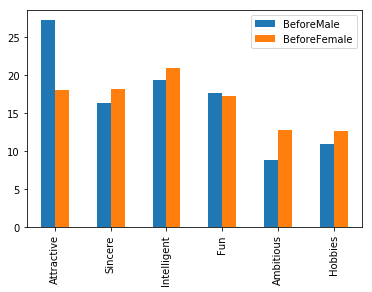

In [46]:
result_before.plot.bar(style=['o','rx'])

In [47]:
#After event female
FafterA=dff.groupby('iid')['attr7_3'].mean().mean()
FafterS=dff.groupby('iid')['sinc7_3'].mean().mean()
FafterI=dff.groupby('iid')['intel7_3'].mean().mean()
FafterF=dff.groupby('iid')['fun7_3'].mean().mean()
FafterAM=dff.groupby('iid')['amb7_3'].mean().mean()
FafterH=dff.groupby('iid')['shar7_3'].mean().mean()

In [48]:
#After event male
MafterA=dfm.groupby('iid')['attr7_3'].mean().mean()
MafterS=dfm.groupby('iid')['sinc7_3'].mean().mean()
MafterI=dfm.groupby('iid')['intel7_3'].mean().mean()
MafterF=dfm.groupby('iid')['fun7_3'].mean().mean()
MafterAM=dfm.groupby('iid')['amb7_3'].mean().mean()
MafterH=dfm.groupby('iid')['shar7_3'].mean().mean()

In [49]:
#creating a new dataframe of all attributes with mean values for female
FAdata = {'AfterFemale':[FafterA,FafterS,FafterI,FafterF,FafterAM,FafterH]}
FAfterDateAttributes=pd.DataFrame(FAdata, index=['Attractive','Sincere','Intelligent','Fun','Ambitious','Hobbies']) 
FAfterDateAttributes

,AfterFemale
Attractive,26.958904
Sincere,18.123288
Intelligent,16.452055
Fun,15.054795
Ambitious,9.465753
Hobbies,14.082192


In [50]:
#creating a new dataframe of all attributes with mean values for male
MAdata = {'AfterMale':[MafterA,MafterS,MafterI,MafterF,MafterAM,MafterH]}
MAfterDateAttributes=pd.DataFrame(MAdata, index=['Attractive','Sincere','Intelligent','Fun','Ambitious','Hobbies']) 
MAfterDateAttributes

,AfterMale
Attractive,36.741379
Sincere,13.344828
Intelligent,17.172414
Fun,17.189655
Ambitious,5.896552
Hobbies,9.827586


In [51]:
result_after = pd.concat([MAfterDateAttributes, FAfterDateAttributes], axis=1, join_axes=[MAfterDateAttributes.index])
result_after

,AfterMale,AfterFemale
Attractive,36.741379,26.958904
Sincere,13.344828,18.123288
Intelligent,17.172414,16.452055
Fun,17.189655,15.054795
Ambitious,5.896552,9.465753
Hobbies,9.827586,14.082192


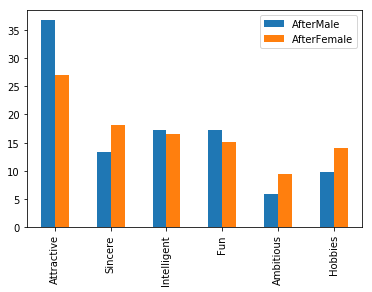

In [52]:
result_after.plot.bar(style=['o','rx'])

##  Finding 2-a

In [53]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [54]:
df2 = df.copy()
df3 = df2[['iid','field']]
df3['field_lowerchar']= df3.field.str.lower()
df4 = df3.groupby('field_lowerchar')['iid'].nunique()
df5 = pd.DataFrame(df4)
df5.rename(columns = {'iid':'Count_iid'},inplace = True)
df5.reset_index(inplace = True)
df6 = df5.sort_values(by = 'Count_iid',ascending = False ).head(10)
#df5 = df4.nlargest(5)
#df5.plot.bar(style=['o','rx'])

/Users/kshitijasankhe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## How many participants from each field

/Users/kshitijasankhe/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


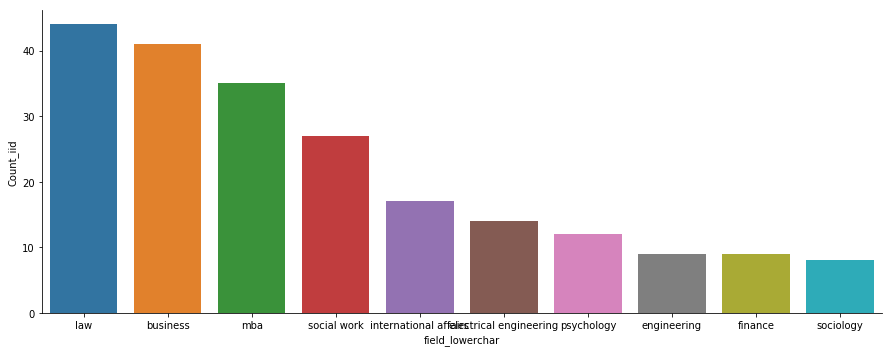

In [55]:
sns.factorplot(y='Count_iid', data=df6, \
               x='field_lowerchar',aspect=2.5, kind='bar')

In [56]:
df.career

0                                                  lawyer
1                                                  lawyer
2                                                  lawyer
3                                                  lawyer
4                                                  lawyer
5                                                  lawyer
6                                                  lawyer
7                                                  lawyer
8                                                  lawyer
9                                                  lawyer
10                                                    law
11                                                    law
12                                                    law
13                                                    law
14                                                    law
15                                                    law
16                                                    law
17            

## Finding 2C

## How important the race is for females and males of different races


### later-Finding race preferences by opposite gender (i.e if you are a female of asian race which male race would you prefer)


Black/African American=1
European/Caucasian-American=2
Latino/Hispanic American=3
Asian/Pacific Islander/Asian-American=4
Native American=5
Other=6

In [57]:
dfFemale=df[df.gender==0]
FRace=dfFemale.groupby('iid').mean()[['race','imprace']]
FRace

,race,imprace
iid,,
1,4.0,2.0
2,2.0,2.0
3,2.0,8.0
4,2.0,1.0
5,2.0,8.0
6,4.0,1.0
7,4.0,2.0
8,2.0,1.0
9,6.0,1.0


In [58]:
FemaleImpRace=FRace.groupby('race')['imprace'].mean()


### Lets add the names of races in below plot instead of numbers (on x axis)

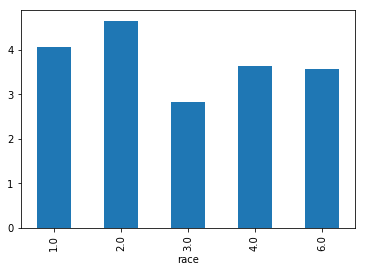

In [59]:
FemaleImpRace.plot.bar(style=['o','rx'])

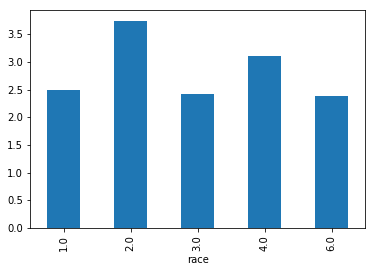

In [60]:
##Adding same thing for males
dfMale=df[df.gender==1]
MRace=dfMale.groupby('iid').mean()[['race','imprace']]
MRace
MaleImpRace=MRace.groupby('race')['imprace'].mean()
MaleImpRace.plot.bar(style=['o','rx'])

### Preferences

In [61]:
Fpref=dfFemale[dfFemale.dec==1][['iid','race','race_o']]
type(Fpref)

pandas.core.frame.DataFrame

In [62]:
Fpref['race_o'].groupby(Fpref['race']).value_counts()


race  race_o
1.0   2.0        68
      4.0        20
      3.0        10
      1.0         8
      6.0         7
2.0   2.0       524
      4.0        86
      3.0        37
      6.0        33
      1.0        26
3.0   2.0        91
      4.0        25
      3.0        13
      6.0        11
      1.0         8
4.0   2.0       270
      4.0        99
      6.0        28
      3.0        23
      1.0        19
6.0   2.0        59
      4.0        15
      3.0        10
      6.0         8
      1.0         4
Name: race_o, dtype: int64

In [63]:
Fprefrace = Fpref.groupby(['race','race_o']).count()

type(Fprefrace)
Fprefrace.reset_index(inplace = True)

Fprefrace

,race,race_o,iid
0,1.0,1.0,8
1,1.0,2.0,68
2,1.0,3.0,10
3,1.0,4.0,20
4,1.0,6.0,7
5,2.0,1.0,26
6,2.0,2.0,524
7,2.0,3.0,37
8,2.0,4.0,86
9,2.0,6.0,33


### Plot race_o for each race - 24th may - redo this

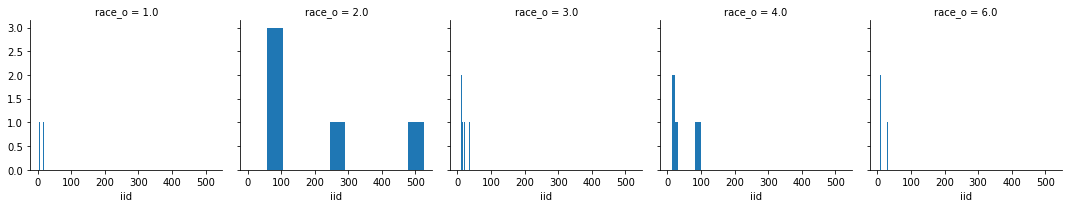

In [64]:
g = sns.FacetGrid(Fprefrace, col="race_o")
g.map(plt.hist, "iid")

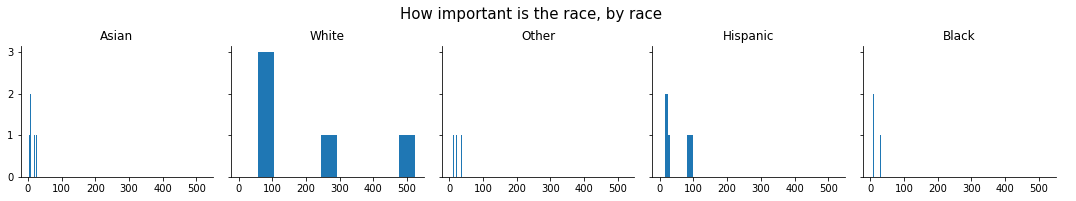

In [65]:
g = sns.FacetGrid(Fprefrace, col='race_o')
g.map(plt.hist, 'iid')
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the race, by race', fontsize=15)
g.add_legend()

In [66]:
ax = Fprefrace.imprace.hist(bins=25, figsize=(12,8))
ax.set_title('How important is the race', fontsize=15)
ax.set_xlabel('Importance',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

AttributeError: 'DataFrame' object has no attribute 'imprace'

In [ ]:
#df.career_c

In [ ]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'age', alpha= 0.7, bins=20)
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age distribution by gender', fontsize=15)
g.add_legend()


In [ ]:
ax = df.imprace.hist(bins=25, figsize=(12,8))
ax.set_title('How important is the race', fontsize=15)
ax.set_xlabel('Importance',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

In [ ]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprace', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the race, by race', fontsize=15)
g.add_legend()

In [ ]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'imprace', alpha= 0.7, bins=10)
g.set_xlabels('Importance', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('How important is the race, by gender', fontsize=15)
g.add_legend()

## 27th May

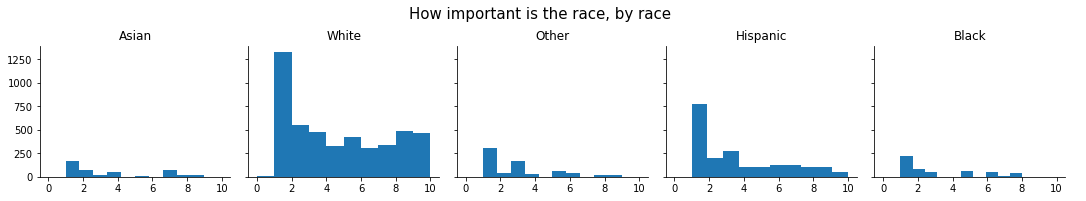

In [70]:
#From Kaggle

g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprace', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the race, by race', fontsize=15)
g.add_legend()